In [1]:
# Created by Joseph Chancey
# Hypothesis: Kills do not matter as much as objectives

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
# Path to datasets & store in Pandas DataFrame
m_df = pd.read_csv('../Data Files/Master_Ranked_Games.csv')
gm_df = pd.read_csv('../Data Files/GrandMaster_Ranked_Games.csv')
ch_df = pd.read_csv('../Data Files/Challenger_Ranked_Games.csv')
pd.set_option('display.max_columns', None)

In [4]:
m_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,4,0,75,33,7,19,13,42979,41910,646,60,12.0,180,2,15575,35335,1,0,0,0,1,0,3,0,2,0,89,37,19,7,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,3,0,45,13,6,22,9,36087,35880,563,56,11.2,119,1,13059,26348,1,1,0,0,1,0,2,0,1,0,64,20,22,6,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,9,2,66,31,30,13,61,64708,58214,651,74,14.8,209,7,37288,64577,0,1,1,0,0,0,2,0,3,0,78,16,13,30,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,5,0,55,9,26,3,34,45772,36545,402,53,10.6,102,6,14093,31303,0,0,0,0,0,0,0,0,0,0,33,11,3,26,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,3,0,75,23,19,24,22,79501,42395,528,60,12.0,96,5,23863,30643,1,0,0,0,0,0,1,0,4,0,70,32,23,19,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,7,1,126,63,42,25,83,142725,82466,803,89,17.8,251,13,67496,98972,0,0,1,1,1,1,3,1,6,1,112,48,25,42,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,0,0,20,3,5,23,4,26093,23058,328,45,9.0,79,1,13559,4206,1,1,1,0,1,0,2,0,3,0,31,4,23,5,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,6,0,91,44,25,37,36,80643,65433,764,78,15.6,206,7,30752,48581,1,0,0,1,1,1,4,2,9,3,109,40,37,25,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,2,0,65,10,23,41,35,80053,44680,504,60,12.0,99,4,16526,19205,1,1,1,1,1,1,2,1,7,1,45,28,41,23,68,116262,59001,524,72,14.4,162,11,52292,60903


In [5]:
gm_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.0,136,5,20503,31788,1,1,0,1,1,1,4,1,7,1,72,29,31,16,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.2,157,7,28612,67404,0,0,0,0,1,0,2,0,1,0,76,28,20,36,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.4,115,5,17630,37483,0,1,0,0,0,0,0,0,1,0,47,19,11,20,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,7,1,49,16,21,7,38,57342,42933,509,61,12.2,129,4,13040,48691,0,1,1,0,0,0,0,0,3,0,43,17,7,21,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,3,0,88,40,25,37,40,97060,61378,771,76,15.2,177,4,23467,31943,1,0,1,1,1,1,3,1,9,2,99,38,37,25,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.2,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,4,0,35,11,10,2,19,22427,30001,399,50,10.0,89,3,10791,24827,0,0,0,0,1,0,1,0,0,0,37,13,2,10,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,7,1,126,63,42,25,83,142725,82466,803,89,17.8,251,13,67496,98972,0,0,1,1,1,1,3,1,6,1,112,48,25,42,41,149798,72167,789,86,17.2,258,6,34890,62124


In [6]:
ch_df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,0,0,72,20,24,28,50,99418,41437,438,60,12.0,106,8,20122,13309,1,0,1,0,1,0,2,0,4,0,52,29,27,24,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,5,1,37,2,29,42,36,61816,61221,346,65,13.0,28,5,32837,44640,1,0,0,0,0,1,0,0,10,2,43,0,40,29,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,4,0,72,29,14,20,19,51604,45013,568,63,12.6,132,4,18131,45242,1,0,0,0,0,0,1,0,3,0,83,28,20,14,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.2,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.0,168,5,25003,45455


In [7]:
# Check datasets for missing values
print(m_df.count())
print('-----------')
print(gm_df.count())
print('-----------')
print(ch_df.count())

gameId                     107125
gameDuraton                107125
blueWins                   107125
blueFirstBlood             107125
blueFirstTower             107125
blueFirstBaron             107125
blueFirstDragon            107125
blueFirstInhibitor         107125
blueDragonKills            107125
blueBaronKills             107125
blueTowerKills             107125
blueInhibitorKills         107125
blueWardPlaced             107125
blueWardkills              107125
blueKills                  107125
blueDeath                  107125
blueAssist                 107125
blueChampionDamageDealt    107125
blueTotalGold              107125
blueTotalMinionKills       107125
blueTotalLevel             107125
blueAvgLevel               107125
blueJungleMinionKills      107125
blueKillingSpree           107125
blueTotalHeal              107125
blueObjectDamageDealt      107125
redWins                    107125
redFirstBlood              107125
redFirstTower              107125
redFirstBaron 

In [26]:
# Sort and filter out Data for Wins - Blue
m_bluewins_df = m_df.loc[m_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
m_blueloss_df = m_df.loc[m_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
m_redwins_df = m_df.loc[m_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
m_redloss_df = m_df.loc[m_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

In [27]:
# Sort and filter out Data for Wins - Blue
gm_bluewins_df = gm_df.loc[gm_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
gm_blueloss_df = gm_df.loc[gm_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
gm_redwins_df = gm_df.loc[gm_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
gm_redloss_df = gm_df.loc[gm_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

In [28]:
# Sort and filter out Data for Wins - Blue
ch_bluewins_df = m_df.loc[m_df["blueWins"] == 1, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Blue
ch_blueloss_df = ch_df.loc[ch_df["blueWins"] == 0, ["blueFirstBlood", "blueFirstTower", "blueFirstBaron",
                                                "blueFirstInhibitor", "blueDragonKills", "blueBaronKills",
                                                "blueTowerKills","blueInhibitorKills", "blueWardPlaced",
                                                "blueWardkills","blueKills","blueDeath","blueAssist",
                                                 "blueChampionDamageDealt","blueTotalGold","blueTotalMinionKills",
                                                 "blueTotalLevel","blueAvgLevel","blueObjectDamageDealt",
                                                "blueTotalHeal","blueKillingSpree","blueJungleMinionKills", "gameDuraton"]]

# Sort and filter out Data for Wins - Red
ch_redwins_df = ch_df.loc[ch_df["redWins"] == 1, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]
# Sort and filter out Data for Losses - Red
ch_redloss_df = ch_df.loc[ch_df["redWins"] == 0, ["redFirstBlood", "redFirstTower", "redFirstBaron",
                                                "redFirstInhibitor", "redDragonKills", "redBaronKills",
                                                "redTowerKills","redInhibitorKills", "redWardPlaced",
                                                "redWardkills","redKills","redDeath","redAssist",
                                                 "redChampionDamageDealt","redTotalGold","redTotalMinionKills",
                                                 "redTotalLevel","redAvgLevel","redObjectDamageDealt",
                                                "redTotalHeal","redKillingSpree","redJungleMinionKills", "gameDuraton"]]

In [11]:
m_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,0.001328,-0.009713,-0.004008,-0.004157,-0.018107,-0.007425,-0.009885,0.028318,-0.019654,-0.021493,-0.016286,-0.023823,0.006087,-0.045984,-0.034666,-0.004343,-0.007889,-0.029827,-0.014825,-0.001094,-0.001094,0.010122,-0.035094,0.018291,0.000534,0.009713,0.003721,0.004832,-0.011160,0.005120,0.000362,0.029080,-0.014731,-0.005871,-0.007101,-0.023867,0.008325,-0.034682,-0.045764,0.001655,-0.004663,-0.023067,-0.009834,0.004138,0.004138,0.012887,-0.026526,0.020292,0.004728
gameDuraton,0.001328,1.000000,-0.020653,0.001113,0.046164,0.402575,0.091122,0.156593,0.494489,0.497172,0.391131,0.265883,0.822047,0.786135,0.402637,0.424629,0.349282,0.685676,0.765709,0.898920,0.750065,0.750065,0.787579,0.362824,0.713091,0.617244,0.020653,0.011759,0.022952,0.421149,0.137833,0.173353,0.528735,0.526533,0.414646,0.285871,0.822555,0.785793,0.425891,0.401731,0.366323,0.693182,0.772841,0.900673,0.755967,0.755967,0.785703,0.376685,0.718363,0.627111
blueWins,-0.009713,-0.020653,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,0.583411,0.023395,0.062683,0.411674,-0.416598,0.328040,0.153082,0.248268,0.067803,0.192247,0.192247,0.201437,0.387202,0.192846,0.527904,-1.000000,-0.209282,-0.471455,-0.396186,-0.281737,-0.655057,-0.470271,-0.381315,-0.728810,-0.578057,-0.064839,-0.105124,-0.418711,0.409883,-0.332346,-0.173848,-0.275944,-0.109334,-0.221730,-0.221730,-0.247116,-0.397022,-0.220708,-0.557780
blueFirstBlood,-0.004008,0.001113,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,0.124774,0.011472,0.018074,0.133469,-0.131250,0.084498,0.041193,0.078277,0.039860,0.051018,0.051018,0.056709,0.121124,0.034819,0.144270,-0.208979,-0.995472,-0.217003,-0.053048,-0.139146,-0.153816,-0.132382,-0.047441,-0.185847,-0.125912,-0.011357,-0.023312,-0.131909,0.132870,-0.086768,-0.041774,-0.077770,-0.034696,-0.051810,-0.051810,-0.056249,-0.126558,-0.035060,-0.143356
blueFirstTower,-0.004157,0.046164,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,0.323699,0.063261,0.089292,0.263391,-0.224527,0.164791,0.115336,0.198912,0.118411,0.153919,0.153919,0.192193,0.255915,0.102505,0.386796,-0.472211,-0.216065,-0.974907,-0.124724,-0.196007,-0.367354,-0.245192,-0.100475,-0.442443,-0.304395,0.015503,-0.018827,-0.225775,0.262191,-0.138609,-0.071147,-0.127329,-0.026023,-0.068079,-0.068079,-0.124301,-0.227451,-0.053142,-0.324156
blueFirstBaron,-0.018107,0.402575,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,0.414582,0.410335,0.404725,0.302841,-0.021204,0.231409,0.312299,0.423081,0.401575,0.385228,0.385228,0.484125,0.270866,0.380609,0.651391,-0.369585,-0.048218,-0.131539,-0.330128,-0.009593,-0.247938,0.048952,-0.208897,-0.134532,-0.189842,0.371147,0.315396,-0.021040,0.301816,-0.038391,0.177221,0.185923,0.387670,0.191596,0.191596,0.250734,-0.028374,0.178618,-0.003921
blueFirstDragon,-0.007425,0.091122,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,0.141852,0.174994,0.133331,0.075192,-0.206693,-0.045051,0.002572,0.080543,0.190257,0.044485,0.044485,0.268259,0.058621,0.088643,0.356591,-0.276402,-0.139088,-0.205082,-0.036020,-0.802574,-0.197406,-0.355751,-0.024325,-0.185270,-0.170430,0.131

In [12]:
gm_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,-0.025042,-0.007960,-0.006417,-0.008420,-0.032824,-0.027225,-0.006222,-0.020071,-0.032693,-0.028450,-0.001489,-0.085142,-0.059394,-0.002356,0.005778,0.041245,0.018010,-0.016319,-0.070316,0.020008,0.020008,-0.050453,0.004141,0.009554,-0.036534,0.007960,0.006007,0.008165,-0.030389,-0.023637,0.002912,-0.018090,-0.034628,-0.018829,0.001598,-0.089577,-0.055136,0.005494,-0.002038,0.045765,0.021226,-0.011376,-0.063812,0.023790,0.023790,-0.046148,0.010232,0.012528,-0.033919
gameDuraton,-0.025042,1.000000,-0.018589,0.001533,0.048111,0.405861,0.094726,0.167544,0.494476,0.502119,0.407733,0.267784,0.820557,0.790085,0.361183,0.383753,0.304367,0.658466,0.753183,0.894718,0.724902,0.724902,0.781414,0.325677,0.705465,0.629790,0.018589,0.010565,0.019031,0.425957,0.148562,0.177137,0.529871,0.532219,0.426744,0.286413,0.821300,0.792174,0.385130,0.360233,0.318131,0.665034,0.760239,0.896487,0.731250,0.731250,0.780910,0.336922,0.708775,0.638573
blueWins,-0.007960,-0.018589,1.000000,0.202711,0.459949,0.361664,0.264384,0.650728,0.449474,0.348685,0.712080,0.567115,0.025605,0.062112,0.417313,-0.418523,0.328821,0.157634,0.252460,0.066309,0.196436,0.196436,0.192385,0.388864,0.198491,0.513225,-1.000000,-0.203157,-0.460805,-0.388301,-0.269935,-0.637846,-0.457600,-0.375097,-0.717318,-0.563791,-0.058309,-0.094832,-0.420711,0.415183,-0.329962,-0.170559,-0.272955,-0.097746,-0.219181,-0.219181,-0.231321,-0.398132,-0.223106,-0.541666
blueFirstBlood,-0.006417,0.001533,0.202711,1.000000,0.212475,0.056349,0.140685,0.153840,0.135139,0.048366,0.190685,0.126303,0.012455,0.016029,0.136422,-0.131195,0.087024,0.042175,0.079352,0.035868,0.052070,0.052070,0.054134,0.124708,0.034178,0.143555,-0.202711,-0.995789,-0.208685,-0.054010,-0.135567,-0.145371,-0.128862,-0.042670,-0.177440,-0.115313,-0.012975,-0.020474,-0.131935,0.135612,-0.087672,-0.042025,-0.075427,-0.029869,-0.048723,-0.048723,-0.051263,-0.124470,-0.038480,-0.136138
blueFirstTower,-0.008420,0.048111,0.459949,0.212475,1.000000,0.138477,0.204402,0.377750,0.288639,0.115972,0.480995,0.306767,0.063304,0.088816,0.263074,-0.225953,0.165958,0.114780,0.196886,0.113391,0.152713,0.152713,0.185913,0.253386,0.102541,0.373510,-0.459949,-0.208195,-0.975995,-0.116154,-0.175836,-0.354673,-0.233370,-0.092168,-0.428209,-0.291519,0.019560,-0.011865,-0.227296,0.261696,-0.140230,-0.070251,-0.124560,-0.015324,-0.064355,-0.064355,-0.111952,-0.227905,-0.055976,-0.311200
blueFirstBaron,-0.032824,0.405861,0.361664,0.056349,0.138477,1.000000,0.130357,0.400443,0.435059,0.884712,0.528228,0.395476,0.415372,0.407263,0.273077,-0.044579,0.199575,0.291210,0.410693,0.405811,0.370094,0.370094,0.483592,0.241085,0.374928,0.647648,-0.361664,-0.054018,-0.125185,-0.325291,0.006521,-0.233430,0.068908,-0.205013,-0.118463,-0.183123,0.375889,0.326334,-0.044386,0.271997,-0.064030,0.159407,0.175516,0.393394,0.176030,0.176030,0.266921,-0.051591,0.171018,0.015274
blueFirstDragon,-0.027225,0.094726,0.264384,0.140685,0.204402,0.130357,1.000000,0.166439,0.587881,0.122767,0.287008,0.116337,0.186706,0.146369,0.047797,-0.226168,-0.070973,-0.017727,0.061388,0.200573,0.021650,0.021650,0.277261,0.031642,0.080419,0.351789,-0.264384,-0.137283,-0.186288,-0.023483,-0.782165,-0.192399,-0.337448,-0.012198,-0.166153,-0.165999,0.147

In [13]:
ch_df.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,-0.025468,-0.005385,-0.010942,0.004411,-0.023029,-0.015300,-0.006665,-0.013351,-0.022253,-0.019476,0.000894,-0.083464,-0.052451,-0.015259,-0.014959,0.027355,0.009712,-0.027175,-0.062907,0.005506,0.005506,-0.035970,-0.004878,0.007881,-0.026895,0.005385,0.010233,-0.006565,-0.034905,-0.022539,-0.001674,-0.022303,-0.038990,-0.020629,-0.002763,-0.081666,-0.061250,-0.014943,-0.015083,0.031041,0.011027,-0.026877,-0.058942,0.007164,0.007164,-0.038405,-0.008652,0.012081,-0.036889
gameDuraton,-0.025468,1.000000,-0.001414,-0.002982,0.055433,0.395313,0.079317,0.207592,0.480537,0.501499,0.431296,0.293628,0.840685,0.804957,0.366724,0.374059,0.337086,0.684659,0.776835,0.900700,0.755377,0.755377,0.799519,0.326444,0.705497,0.640389,0.001414,0.014910,0.011624,0.417492,0.126008,0.201119,0.513461,0.528711,0.429695,0.294642,0.840759,0.806386,0.374961,0.365549,0.342904,0.686816,0.777556,0.903212,0.759482,0.759482,0.796047,0.335574,0.706917,0.635481
blueWins,-0.005385,-0.001414,1.000000,0.206442,0.449065,0.366722,0.267778,0.637521,0.466442,0.355048,0.708405,0.554367,0.037542,0.070485,0.453521,-0.439782,0.372974,0.180180,0.276481,0.078853,0.226127,0.226127,0.207726,0.420451,0.215695,0.525094,-1.000000,-0.207341,-0.446742,-0.394066,-0.267998,-0.622811,-0.467407,-0.381037,-0.709306,-0.547457,-0.050044,-0.087605,-0.441799,0.451537,-0.356230,-0.173693,-0.270733,-0.083117,-0.215335,-0.215335,-0.231264,-0.411601,-0.222140,-0.548136
blueFirstBlood,-0.010942,-0.002982,0.206442,1.000000,0.209255,0.057685,0.133711,0.146766,0.135553,0.047449,0.182879,0.120126,0.007325,0.013368,0.131871,-0.152955,0.082355,0.033446,0.068347,0.029703,0.045685,0.045685,0.056812,0.123159,0.021933,0.138878,-0.206442,-0.995993,-0.206566,-0.061839,-0.127026,-0.140193,-0.137315,-0.053675,-0.180775,-0.115754,-0.015520,-0.024865,-0.153660,0.131082,-0.102884,-0.061781,-0.090844,-0.030316,-0.057688,-0.057688,-0.056519,-0.143134,-0.043987,-0.147183
blueFirstTower,0.004411,0.055433,0.449065,0.209255,1.000000,0.134875,0.195663,0.344918,0.286556,0.112454,0.466119,0.287067,0.066665,0.092676,0.274319,-0.232112,0.181827,0.125737,0.205284,0.115147,0.165176,0.165176,0.189967,0.265503,0.110765,0.371794,-0.449065,-0.205037,-0.976836,-0.115343,-0.166657,-0.319866,-0.234265,-0.087375,-0.414710,-0.266283,0.023182,-0.010243,-0.233292,0.272922,-0.140172,-0.067617,-0.120010,-0.006552,-0.053443,-0.053443,-0.110690,-0.227322,-0.047059,-0.309297
blueFirstBaron,-0.023029,0.395313,0.366722,0.057685,0.134875,1.000000,0.116563,0.424044,0.403234,0.880056,0.529667,0.407331,0.399604,0.387845,0.299192,-0.047177,0.242308,0.313691,0.428876,0.387380,0.397201,0.397201,0.470242,0.263772,0.376371,0.633739,-0.366722,-0.055406,-0.121773,-0.342623,-0.012061,-0.225692,0.050167,-0.218780,-0.124365,-0.175491,0.359896,0.311173,-0.047412,0.298074,-0.053746,0.172979,0.180171,0.373894,0.187407,0.187407,0.248108,-0.048145,0.164696,-0.005932
blueFirstDragon,-0.015300,0.079317,0.267778,0.133711,0.195663,0.116563,1.000000,0.163540,0.583926,0.108725,0.267873,0.115988,0.156538,0.120762,0.081948,-0.218187,-0.023811,0.006938,0.077442,0.168549,0.042150,0.042150,0.243731,0.061190,0.085937,0.328543,-0.267778,-0.130395,-0.177497,-0.040840,-0.833177,-0.178384,-0.392175,-0.029286,-0.170506,-0.15158

Blue won a total of 53041 matches.
Red won a total of 54084 matches.
The difference is 1043 - in favor of the Red team.
Percentage of wins for blue is: 0.495%
Percentage of wins for red is: 0.505%


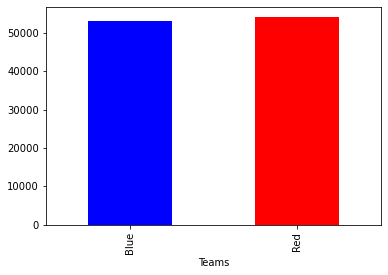

In [14]:
# DataFrame for Master Elo Wins RED/BLUE
m_win_diff = m_df[['gameId', 'blueWins', 'redWins']]
m_win_diff.set_index('gameId')

# Sum Totals
master_elo_win_sum_blue = m_win_diff['blueWins'].sum()
master_elo_win_sum_red = m_win_diff['redWins'].sum()

# Average Totals
master_elo_win_avg_blue = m_win_diff['blueWins'].mean()
# Rround Blue
master_elo_win_avg_blue = round(master_elo_win_avg_blue, 3)
# Round Red
master_elo_win_avg_red = m_win_diff['redWins'].mean()
master_elo_win_avg_red = round(master_elo_win_avg_red, 3)

# Store data in a dictionary
master_sumwin_data = [['Blue', master_elo_win_sum_blue], ['Red', master_elo_win_sum_red]]
# Create coloumn names 
master_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
master_elo_sum_wins_total = pd.DataFrame(master_sumwin_data, columns=master_column_names)

# Calculate difference
master_win_diff = master_elo_win_sum_red - master_elo_win_sum_blue

# Display Results
print(f'Blue won a total of {master_elo_win_sum_blue} matches.')
print(f'Red won a total of {master_elo_win_sum_red} matches.')
print(f'The difference is {master_win_diff} - in favor of the Red team.')
print(f'Percentage of wins for blue is: {master_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {master_elo_win_avg_red}%')

# Display Bar Chart of win totals results
master_bar_plot_wins = master_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'], legend=False)

Blue won a total of 32659 matches.
Red won a total of 33237 matches.
The difference is 578 - in favor of the Red team.
Percentage of wins for blue is: 0.496%
Percentage of wins for red is: 0.504%


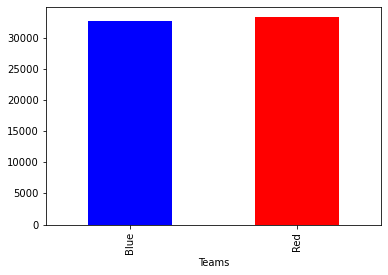

In [15]:
# DataFrame for Grand Master Elo Wins RED/BLUE
gm_win_diff = gm_df[['gameId', 'blueWins', 'redWins']]
gm_win_diff.set_index('gameId')

# Sum Totals
gmaster_elo_win_sum_blue = gm_win_diff['blueWins'].sum()
gmaster_elo_win_sum_red = gm_win_diff['redWins'].sum()

# Average Totals
gmaster_elo_win_avg_blue = gm_win_diff['blueWins'].mean()
# Rround Blue
gmaster_elo_win_avg_blue = round(gmaster_elo_win_avg_blue, 3)
# Round Red
gmaster_elo_win_avg_red = gm_win_diff['redWins'].mean()
gmaster_elo_win_avg_red = round(gmaster_elo_win_avg_red, 3)

# Store data in a dictionary
gmaster_sumwin_data = [['Blue', gmaster_elo_win_sum_blue], ['Red', gmaster_elo_win_sum_red]]
# Create coloumn names 
gmaster_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
gmaster_elo_sum_wins_total = pd.DataFrame(gmaster_sumwin_data, columns=gmaster_column_names)

# Calculate difference
gmaster_win_diff = gmaster_elo_win_sum_red - gmaster_elo_win_sum_blue

# Display Results
print(f'Blue won a total of {gmaster_elo_win_sum_blue} matches.')
print(f'Red won a total of {gmaster_elo_win_sum_red} matches.')
print(f'The difference is {gmaster_win_diff} - in favor of the Red team.')
print(f'Percentage of wins for blue is: {gmaster_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {gmaster_elo_win_avg_red}%')

# Display Bar Chart of win totals results
gmaster_bar_plot_wins = gmaster_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'],  legend=False)

Blue won a total of 13454 matches.
Red won a total of 13450 matches.
The difference is 4 - in favor of the Blue team.
Percentage of wins for blue is: 0.50007%
Percentage of wins for red is: 0.49993%


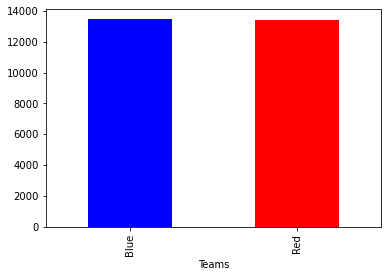

In [16]:
# DataFrame for Challenger Elo Wins RED/BLUE
ch_win_diff = ch_df[['gameId', 'blueWins', 'redWins']]
ch_win_diff.set_index('gameId')

# Sum Totals
ch_elo_win_sum_blue = ch_win_diff['blueWins'].sum()
ch_elo_win_sum_red = ch_win_diff['redWins'].sum()

# Average Totals
ch_elo_win_avg_blue = ch_win_diff['blueWins'].mean()
# Rround Blue
ch_elo_win_avg_blue = round(ch_elo_win_avg_blue, 5)
# Round Red
ch_elo_win_avg_red = ch_win_diff['redWins'].mean()
ch_elo_win_avg_red = round(ch_elo_win_avg_red, 5)

# Store data in a dictionary
ch_sumwin_data = [['Blue', ch_elo_win_sum_blue], ['Red', ch_elo_win_sum_red]]
# Create coloumn names 
ch_column_names = ['Teams', 'Win Count']
# Create DataFrame with the two lines above for sum totals
ch_elo_sum_wins_total = pd.DataFrame(ch_sumwin_data, columns=ch_column_names)

# Calculate difference
ch_win_diff = ch_elo_win_sum_blue - ch_elo_win_sum_red

# Display Results
print(f'Blue won a total of {ch_elo_win_sum_blue} matches.')
print(f'Red won a total of {ch_elo_win_sum_red} matches.')
print(f'The difference is {ch_win_diff} - in favor of the Blue team.')
print(f'Percentage of wins for blue is: {ch_elo_win_avg_blue}%')
print(f'Percentage of wins for red is: {ch_elo_win_avg_red}%')

# Display Bar Chart of win totals results
ch_bar_plot_wins = ch_elo_sum_wins_total.plot.bar(x='Teams', y='Win Count', color=['blue','red'], legend=False)

Text(0, 0.5, 'Time (Seconds)')

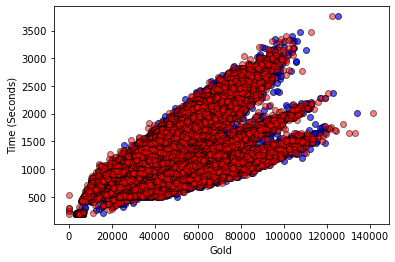

In [56]:
# Plot Game Length vs Gold Income - Master Games

m_df['totalGoldDiff'] = m_df['redTotalGold'] - m_df['blueTotalGold']

master_length_wins_df = m_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(master_length_wins_df['blueTotalGold'], master_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(master_length_wins_df['redTotalGold'], master_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')

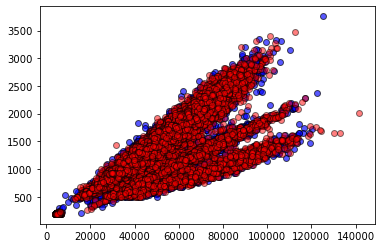

In [43]:
# Plot Game Length vs Gold Income

m_df['totalGoldDiff'] = m_df['redTotalGold'] - m_df['blueTotalGold']

master_length_wins_df = m_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
master_wins_b_rIncome_plot = plt.scatter(m_bluewins_df['blueTotalGold'], m_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
master_wins_b_rIncome_plot = plt.scatter(m_redwins_df['redTotalGold'], m_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Master Games - Gold/Time')

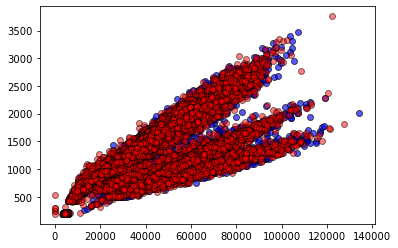

In [44]:
# Compare income over time in lost games 
master_loss_b_rIncome_plot = plt.scatter(m_blueloss_df['blueTotalGold'], m_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
master_loss_b_rIncome_plot = plt.scatter(m_redloss_df['redTotalGold'], m_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Master Games - Gold/Time')

In [50]:
# Below are Grand Master Charts
print('----------------------')

----------------------


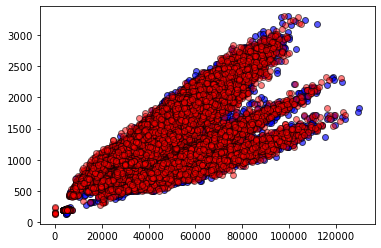

In [46]:
# Plot Game Length vs Gold Income TOTAL - Grand Master

gm_df['totalGoldDiff'] = gm_df['redTotalGold'] - gm_df['blueTotalGold']

gmaster_length_wins_df = gm_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(gmaster_length_wins_df['blueTotalGold'], gmaster_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(gmaster_length_wins_df['redTotalGold'], gmaster_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Total Grand Master Games - Gold/Time')

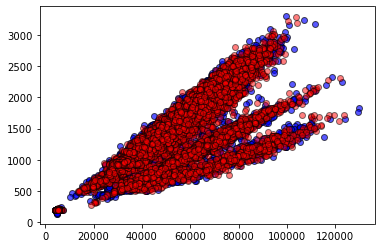

In [47]:
# Plot Game Length vs Gold Income WINS - Grand Master

gm_df['totalGoldDiff'] = gm_df['redTotalGold'] - gm_df['blueTotalGold']

gmaster_length_wins_df = gm_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
gmaster_wins_b_rIncome_plot = plt.scatter(gm_bluewins_df['blueTotalGold'], gm_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
gmaster_wins_b_rIncome_plot = plt.scatter(gm_redwins_df['redTotalGold'], gm_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Won Grand Master Games - Gold/Time')

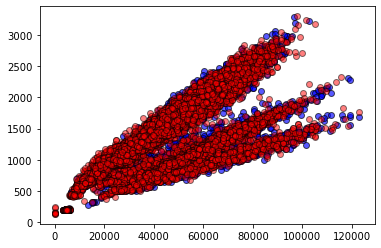

In [48]:
# Compare income over time in LOST games - Grand Master
gmaster_loss_b_rIncome_plot = plt.scatter(gm_blueloss_df['blueTotalGold'], gm_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
gmaster_loss_b_rIncome_plot = plt.scatter(gm_redloss_df['redTotalGold'], gm_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Grand Master Games - Gold/Time')

In [51]:
# Below are Challenger  Charts
print('----------------------')

----------------------


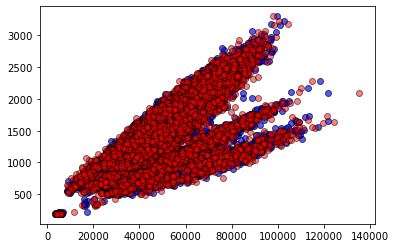

In [52]:
# Plot Game Length vs Gold Income TOTAL - Challenger

ch_df['totalGoldDiff'] = ch_df['redTotalGold'] - ch_df['blueTotalGold']

ch_length_wins_df = ch_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Plot Total Red/Blue game duration against income
plt.scatter(ch_length_wins_df['blueTotalGold'], ch_length_wins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
plt.scatter(ch_length_wins_df['redTotalGold'], ch_length_wins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Total Challenger Games - Gold/Time')

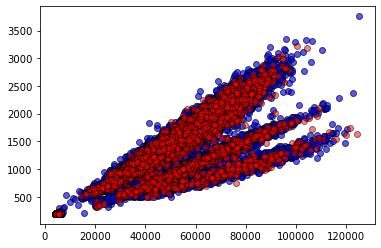

In [53]:
# Plot Game Length vs Gold Income WINS - Grand Master

ch_df['totalGoldDiff'] = ch_df['redTotalGold'] - ch_df['blueTotalGold']

ch_length_wins_df = ch_df[['gameId', 'blueWins', 'redWins', 'blueTotalGold', 'gameDuraton', 'redTotalGold']]

# Compare income over time in winning games 
ch_wins_b_rIncome_plot = plt.scatter(ch_bluewins_df['blueTotalGold'], ch_bluewins_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
ch_wins_b_rIncome_plot = plt.scatter(ch_redwins_df['redTotalGold'], ch_redwins_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Won Challenger Games - Gold/Time')

Text(0.5, 1.0, 'Lost Challenger Games - Gold/Time')

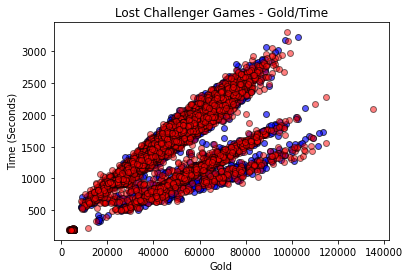

In [57]:
# Compare income over time in LOST games - Challenger
ch_loss_b_rIncome_plot = plt.scatter(ch_blueloss_df['blueTotalGold'], ch_blueloss_df['gameDuraton'], marker="o", facecolors="blue", edgecolors="black", alpha=0.65)
ch_loss_b_rIncome_plot = plt.scatter(ch_redloss_df['redTotalGold'], ch_redloss_df['gameDuraton'], marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.xlabel('Gold')
plt.ylabel('Time (Seconds)')
plt.title('Lost Challenger Games - Gold/Time')

In [18]:
# Plot kills vs Game Length

In [19]:
# Plot Gold Diff vs Wins

In [20]:
# Plot Gold Diff vs Game Length

In [21]:
# Plot First inhib vs Wins

In [22]:
# Plot First Drag vs Wins

In [23]:
# Plot wardsPlaced vs Game length

In [24]:
# Plot wardsPlaced vs Game Wins